<img src="Archivos/miad4.png" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
# cargar paquetes necesarios para el proyecto

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
import panel as pn
import plotly.graph_objects as go

Se utilizarán los resultados del primer y segundo semestre de 2019 y 2020, y del primer semestre de 2021.

De esta manera se tiene información del último año y medio, con cinco periodos en cuestión. Se decide utilizar estas fechas para poder tener la información más actualizada posible, dado que en el proyecto se buscará generar pronóstico, para lo cual parece de alta importancia manejar datos recientes.

In [2]:
archivo19_1 = pd.read_csv("Archivos/SB11_20191.txt",sep="¬", engine='python')
archivo19_2 = pd.read_csv("Archivos/SB11_20192.txt",sep="¬", engine='python')
archivo20_1 = pd.read_csv("Archivos/SB11_20201.txt",sep="¬", engine='python')
archivo20_2 = pd.read_csv("Archivos/SB11_20202.txt",sep="¬", engine='python')
archivo21_1 = pd.read_csv("Archivos/SB11_20211.txt",sep="¬", engine='python')

Se unen las bases de datos de los cinco periodos seleccionados, exclusivamente para las variables que se repitan en cada periodo. Lo anterior para minimizar los valores nulos.

In [3]:
base = pd.concat([archivo19_1,archivo19_2,archivo20_1,archivo20_2,archivo21_1],
                 axis = 0, join = 'inner', ignore_index = True, keys = None, sort = False)

variables = []

for i in archivo21_1.columns.values:
    if not i in base.columns.values:
        variables.append(i)

base.index = base["ESTU_CONSECUTIVO"]

De la unión de las cinco bases de datos resultan 77 variables, las cuales corresponden a las de la base de datos del primer semestre de 2021, menos "PERCENTIL ESPECIAL GLOBAL".
**La base de datos cuenta con 1.103.130 observaciones.**

Una vez consolidada la base general, se decide eliminar el resto de bases de datos importadas para no forzar innnecesariamente el programa

In [4]:
del archivo19_1
del archivo19_2
del archivo20_1
del archivo20_2
del archivo21_1
del i

Se seleccionan 13 variables de interés:

* Género del estudiante
* Estrato de la vivienda de la familia del estudiante
* Nivel educativo del padre del estudiante
* Nivel educativo de la madre del estudiante
* Si la familia del estudiante tiene o no internet
* Si la familia del estudiante tiene o no computador
* Dedicación diaria del estudiante a la lectura
* Área de ubicación del colegio (rural o urbana)
* Jornada escolar del colegio del estudiante
* Calendario del colegio del estudiante
* Si el colegio del estudiante es bilingüe o no
* Puntuación global del estudiante en la prueba
* Percentil global del estudiante en la prueba

In [5]:
base = base[["ESTU_GENERO","FAMI_ESTRATOVIVIENDA","FAMI_EDUCACIONPADRE",
             "FAMI_EDUCACIONMADRE","FAMI_TIENEINTERNET","FAMI_TIENECOMPUTADOR",
             "ESTU_DEDICACIONLECTURADIARIA","PUNT_GLOBAL","PERCENTIL_GLOBAL","COLE_AREA_UBICACION",
             "COLE_JORNADA","COLE_CALENDARIO","COLE_BILINGUE"]]

**Datos Faltantes**

In [6]:
datos_faltantes = base.isnull().sum(); datos_faltantes
datos_faltantes.sum()

467674

En total se observan 467674 datos faltantes en la base de datos de las variables de interés.

Si bien, usualmente se recomienda darle tratamiento a los datos faltantes, ya sea por imputación, o llevando a cabo el análisis estadístico con y luego sin datos faltantes, para este caso en específico, y por practicidad, se decide prescindir de los datos faltantes, eliminando estas obervaciones de la base de datos.

In [7]:
base=base.dropna()
base.info()
base.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 856479 entries, SB11201910008548 to SB11202110060431
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ESTU_GENERO                   856479 non-null  object 
 1   FAMI_ESTRATOVIVIENDA          856479 non-null  object 
 2   FAMI_EDUCACIONPADRE           856479 non-null  object 
 3   FAMI_EDUCACIONMADRE           856479 non-null  object 
 4   FAMI_TIENEINTERNET            856479 non-null  object 
 5   FAMI_TIENECOMPUTADOR          856479 non-null  object 
 6   ESTU_DEDICACIONLECTURADIARIA  856479 non-null  object 
 7   PUNT_GLOBAL                   856479 non-null  int64  
 8   PERCENTIL_GLOBAL              856479 non-null  float64
 9   COLE_AREA_UBICACION           856479 non-null  object 
 10  COLE_JORNADA                  856479 non-null  object 
 11  COLE_CALENDARIO               856479 non-null  object 
 12  COLE_BILINGUE           

,PUNT_GLOBAL,PERCENTIL_GLOBAL
count,856479.000000,856479.000000
mean,252.463450,51.874889
std,51.142435,28.659708
min,0.000000,1.000000
25%,213.000000,27.000000
50%,249.000000,52.000000
75%,288.000000,77.000000
max,500.000000,100.000000


Al hacer este procedimiento, se eliminan 246651 observaciones. De esta manera nuestra base ahora cuenta con 856479 observaciones, lo cual parece sufiucientemente amplia para llevar a cabo el análisis.

Como se puede observar, tan solo las variables de puntuación y percentil global de la prueba son numéricas, las 11 variables restantes son categóricas.

Estas 11 variables categóricas se espera que expliquen el desempeño en la prueba de los estudiantes.

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

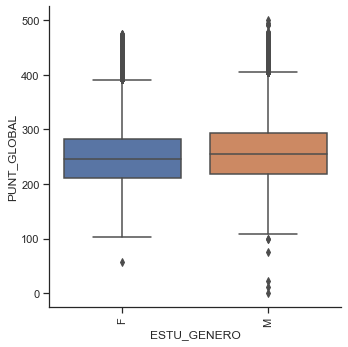

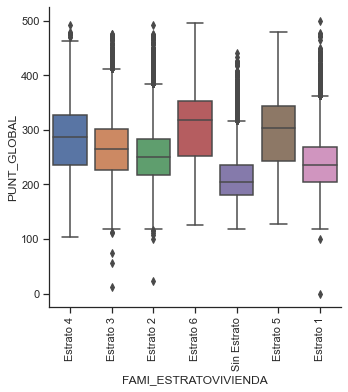

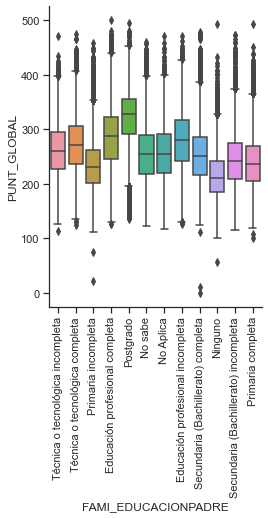

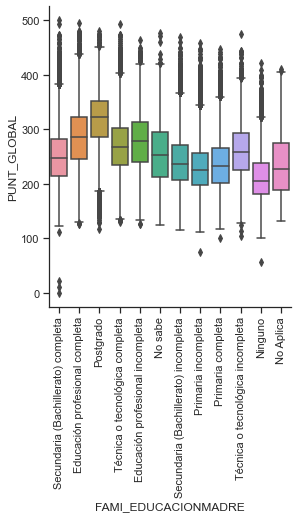

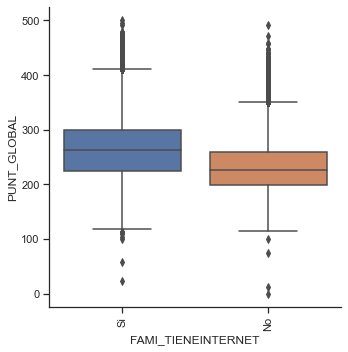

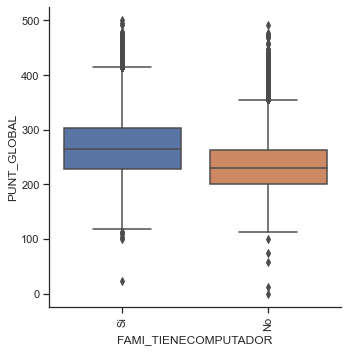

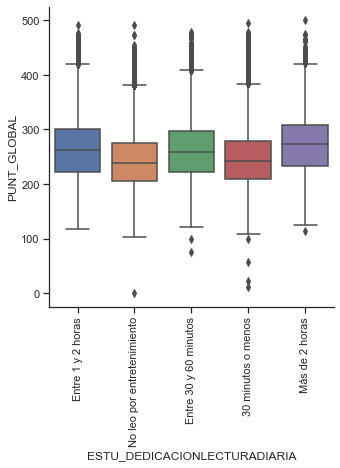

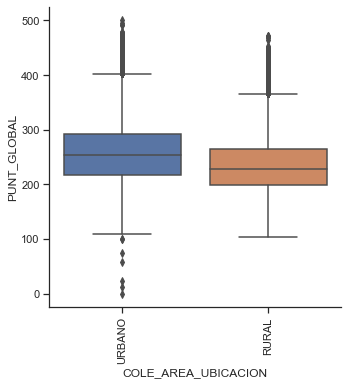

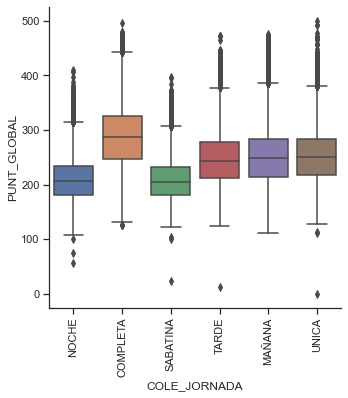

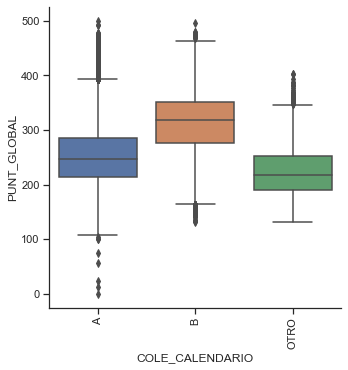

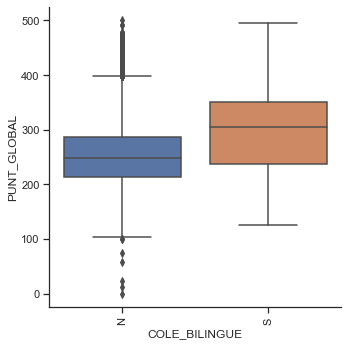

In [8]:
sns.catplot(x="ESTU_GENERO", y="PUNT_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="FAMI_EDUCACIONPADRE", y="PUNT_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="FAMI_EDUCACIONMADRE", y="PUNT_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="FAMI_TIENEINTERNET", y="PUNT_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="FAMI_TIENECOMPUTADOR", y="PUNT_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="ESTU_DEDICACIONLECTURADIARIA", y="PUNT_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="COLE_AREA_UBICACION", y="PUNT_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="COLE_JORNADA", y="PUNT_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="COLE_CALENDARIO", y="PUNT_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="COLE_BILINGUE", y="PUNT_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)

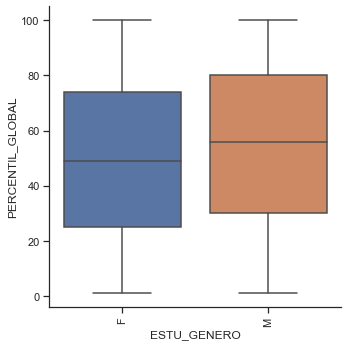

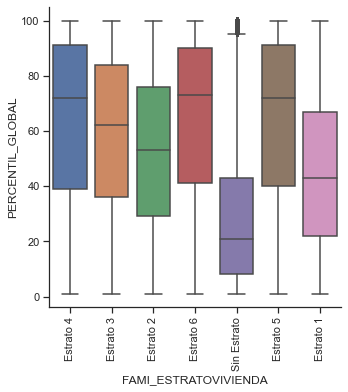

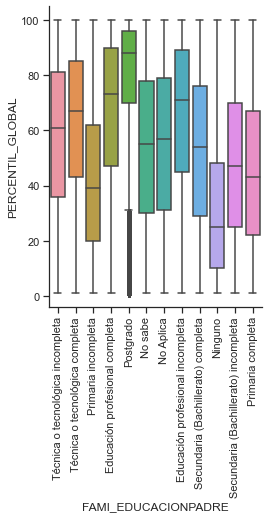

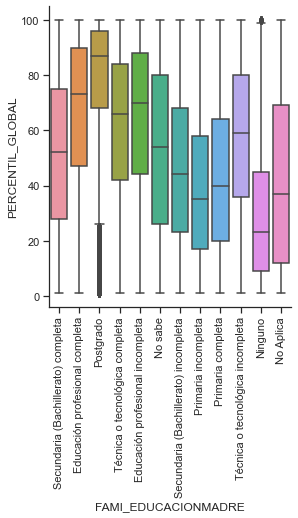

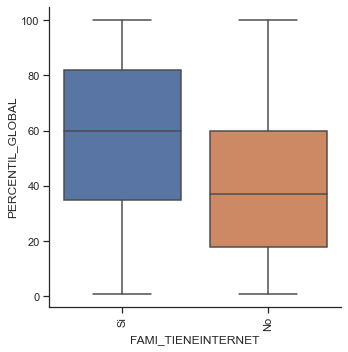

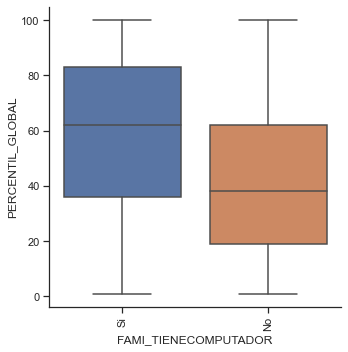

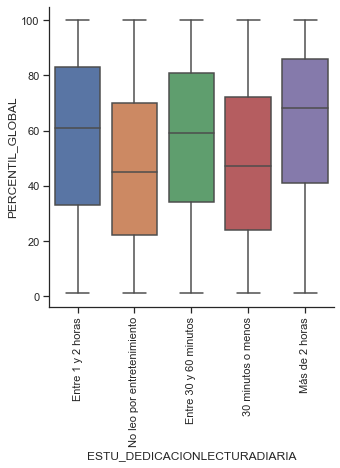

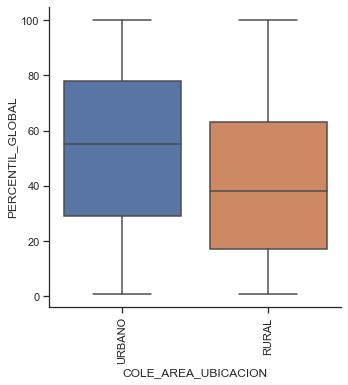

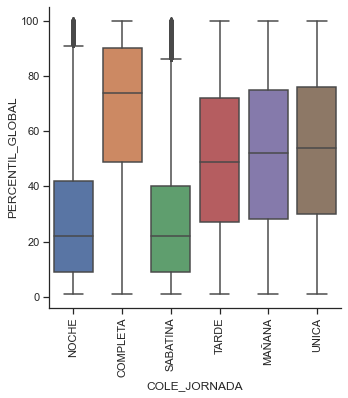

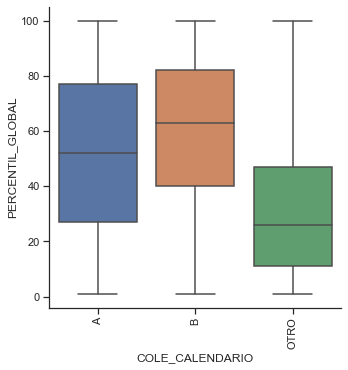

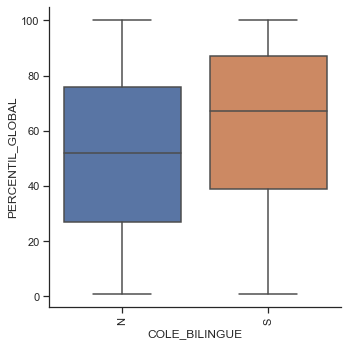

In [9]:
sns.catplot(x="ESTU_GENERO", y="PERCENTIL_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="FAMI_ESTRATOVIVIENDA", y="PERCENTIL_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="FAMI_EDUCACIONPADRE", y="PERCENTIL_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="FAMI_EDUCACIONMADRE", y="PERCENTIL_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="FAMI_TIENEINTERNET", y="PERCENTIL_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="FAMI_TIENECOMPUTADOR", y="PERCENTIL_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="ESTU_DEDICACIONLECTURADIARIA", y="PERCENTIL_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="COLE_AREA_UBICACION", y="PERCENTIL_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="COLE_JORNADA", y="PERCENTIL_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="COLE_CALENDARIO", y="PERCENTIL_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)
sns.catplot(x="COLE_BILINGUE", y="PERCENTIL_GLOBAL", kind="box", data=base).set_xticklabels(rotation=90)

A partir de las gráficas, se obtienen las siguientes conclusiones:
* **Género:** Parece ser que el género masculino tiene un mejor desempeño
* **Estrato:** Los estudiantes de los estratos 3 a 6 parecen tener un desempeño similar, mientras que para el estrato 1 y 2 el deempeño parece ser menor. De igual manera los estudiantes sin estrato parecen obtener los peores resultados.
* **Educación del padre:** Parece haber cierta homogeneidad en los resultados, excepto por los estudiantes con un padre con postgrado, los cuales parecen tener mejores resultados en la prueba, y con un padra sin educación, que parecen tener peores resultados.
* **Educación de la madre:** Parece haber cierta homogeneidad en los resultados, excepto por los estudiantes con un padre con postgrado, los cuales parecen tener mejores resultados en la prueba, y con un padra sin educación, que parecen tener peores resultados.
* **Internet:** Parece ser que los estudiantes que cuentan con internet en sus hogares obtienen un mejor desempeño.
* **Computador:** Parece ser que los estudiantes que cuentan con computador en sus hogares obtienen un mejor desempeño.
* **Lectura diaria:** Se observa cierta homogeneidad en los resultados, sin embargo, los estudiantes que no leen por entretenimiento o que leen 20 minutos o menos parecen obtener peores resultados.
* **Area colegio:** Al parecer, los estudiantes de colegios urbanos presentan mejores resultados que los rurales.
* **Jornada colegio:** Al parecer, los estudiantes de colegios con jornada noche y sabatina obtienen un peor desempeño que el resto.
* **Calendario colegio:** Parece ser que los estudiantes de colegio con calendario B tendrían mejor desempeño que el resto, y los estudiantes con otro tipo de calendario obtienen un peor desempeño.
* **Colegio bilingue:** Al parecer, los estudiantes de colegios bilingües presentan mejores resultados que los no bilingües.

Se utilizarán todas las variables descritas anteriormente, menos la educación del padre y de la madre, para llevar a cabo un análisis más profundo


**Preguntas analíticas que surgen del análisis gráfico:**

**1.** ¿El conjunuto de variables categóricas son adecuadas para explicar una variable numérica como lo es el puntaje de la pueba o el percentil?

**2.** A partir de estos datos en específico, ¿Es mejor intentar explicar una variable dicotómica, en vez de una numérica?

**3.** ¿Se puede predecir adecuadamente el desempeño de los estudiantes a partir de las variables socio-demográficas seleccionadas?

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

**En primer lugar, de acuerdo con el análisis gráfico, se decide transformar las variables de la siguiente manera:**

* **Jornada:** 
1. Noche o sabatina
2. Completa, única, tarde o mañana 

* **Estrato:**
1. 4, 5 o 6
2. 2 o 3
3. 1
4. Sin estrato

* **Dedicación lectura diaria:**
1. No lee o lee máximo 30 minutos
2. Lee más de 30 minutos

In [10]:
# COLE_JORNADA

base["COLE_JORNADA"].unique().tolist()

base.replace(to_replace=["NOCHE","SABATINA"],value="Noche o sabatina", inplace=True)
base.replace(to_replace=['COMPLETA', 'TARDE', 'MAÑANA', 'UNICA'],value="Completa, tarde, mañana o unica", inplace=True)

# FAMI_ESTRATOVIVIENDA

base["FAMI_ESTRATOVIVIENDA"].unique().tolist()

base["FAMI_ESTRATOVIVIENDA"].replace(to_replace=['Estrato 4', 'Estrato 6','Estrato 5'],value="Estrato 4, 5 o 6", inplace=True)
base["FAMI_ESTRATOVIVIENDA"].replace(to_replace=['Estrato 2', 'Estrato 3'],value="Estrato 2 o 3", inplace=True)

# ESTU_DEDICACIONLECTURADIARIA

base["ESTU_DEDICACIONLECTURADIARIA"].unique().tolist()

base["ESTU_DEDICACIONLECTURADIARIA"].replace(to_replace=['30 minutos o menos', 'No leo por entretenimiento'],value="No lee o lee menos de 30min", inplace=True)
base["ESTU_DEDICACIONLECTURADIARIA"].replace(to_replace=['Entre 1 y 2 horas',
 'Entre 30 y 60 minutos',
 'Más de 2 horas'],value="lee mas de 30min", inplace=True)


In [11]:
base.COLE_JORNADA.value_counts()

Completa, tarde, mañana o unica    770791
Noche o sabatina                    85688
Name: COLE_JORNADA, dtype: int64

In [12]:
base.FAMI_ESTRATOVIVIENDA.value_counts()

Estrato 2 o 3       498917
Estrato 1           255349
Estrato 4, 5 o 6     78189
Sin Estrato          24024
Name: FAMI_ESTRATOVIVIENDA, dtype: int64

In [13]:
base.ESTU_DEDICACIONLECTURADIARIA.value_counts()

No lee o lee menos de 30min    490759
lee mas de 30min               365720
Name: ESTU_DEDICACIONLECTURADIARIA, dtype: int64

Creamos la variable categórica de si un estudiante se encuentra en riesgo o no, para llevar a cabo un modelo de clasificación.

La variable RIESGO toma valor 1 si el estudienta se encuentra en riesgo (percentil global inferior a 20), y toma el valor 0 en cualquier otro caso.

In [14]:
base['RIESGO'] = np.where(base['PERCENTIL_GLOBAL']<30, 1, 0)

Convertimos las variables categóricas en dummies para agregar al modelo y las agregamos al data frame

In [15]:
dummies1 = pd.get_dummies(base['ESTU_GENERO'], drop_first = True, prefix='GENERO')
dummies2 = pd.get_dummies(base['FAMI_ESTRATOVIVIENDA'], drop_first = True, prefix='ESTRATO')
dummies3 = pd.get_dummies(base['FAMI_TIENEINTERNET'], drop_first = True, prefix='INTERNET')
dummies4 = pd.get_dummies(base['FAMI_TIENECOMPUTADOR'], drop_first = True, prefix='COMPUTADOR')
dummies5 = pd.get_dummies(base['ESTU_DEDICACIONLECTURADIARIA'], drop_first = True, prefix='LECTURA')
dummies6 = pd.get_dummies(base['COLE_AREA_UBICACION'], drop_first = True, prefix='AREA_COLEGIO')
dummies7 = pd.get_dummies(base['COLE_JORNADA'], drop_first = True, prefix='JORNADA')
dummies8 = pd.get_dummies(base['COLE_BILINGUE'], drop_first = True, prefix='BILINGUE')

dummies = pd.concat([dummies1, dummies2,dummies3,dummies4,
                     dummies5,dummies6,dummies7,dummies8], axis = 1)

base = pd.concat([base, dummies], axis = 1)

Creamos el set de variables explicativas y el de respuesta

In [16]:
X = base[['GENERO_M',
          'ESTRATO_Estrato 2 o 3',
          'ESTRATO_Estrato 4, 5 o 6',
          'ESTRATO_Sin Estrato',
          'INTERNET_Si',
          'COMPUTADOR_Si',
          'LECTURA_lee mas de 30min',
          'AREA_COLEGIO_URBANO',
          'JORNADA_Noche o sabatina',
          'BILINGUE_S']]

y = base[["RIESGO"]]

Corremos un modelo de regresión logística

In [17]:
# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Declaramos una instancia del modelo
mod = LogisticRegression()

# Entrenamos el modelo
mod.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = mod.predict(X_test)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Métricas de evaluación de desempeño del modelo:**

In [18]:
accuracy_score(y_test, y_pred)

0.7560713618531665

In [19]:
recall_score(y_test, y_pred)

0.25545144621454147

Con un **Accuracy de 0.75** y un **Recall de 0.25**, el modelo parece tener un desempeño suficientemente bueno para hacer pronóstico

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [20]:
import plotly.graph_objects as go
import ipywidgets as widgets
import pandas as pd
from ipywidgets import interactive

In [21]:
v_alfa = widgets.IntSlider(min = 10, max = 90, step = 5)
v_variable = widgets.Dropdown(
                        description = 'Variable de interés:',
                        options = ["ESTU_GENERO","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET","FAMI_TIENECOMPUTADOR",
                                   "ESTU_DEDICACIONLECTURADIARIA","COLE_AREA_UBICACION","COLE_JORNADA","COLE_CALENDARIO", "COLE_BILINGUE"],
                        style = {'description_width': 'initial'}
                       )


fig = go.FigureWidget(
                        data = go.Heatmap(name = 'heatmap'),  
    
                        layout = go.Layout(
                                            title = 'Mapa de calor: Riesgo vs. Variable de interés'
                                          )
                     )


def filtrar():   
    df = pd.DataFrame({'Percentil_Global': base["PERCENTIL_GLOBAL"], 'Variable': base[v_variable.value]})
    df['RIESGO'] = np.where(df['Percentil_Global']<v_alfa.value, 1, 0)
    df['Riesgo'] = np.where(df['Percentil_Global']<v_alfa.value, "Con riesgo", "Sin Riesgo")

    mat = pd.crosstab(df['Riesgo'], df['Variable']) 
    fig.data[0].x = mat.columns
    fig.data[0].y = mat.index
    fig.data[0].z = mat

def respuesta(change):
    filtrar()

v_alfa.observe(respuesta, names = 'value')
v_variable.observe(respuesta, names = 'value')

filtrar()





def filtrar2(percentil_de_riesgo,v_genero,v_estrato,v_internet,v_pc,v_lee,v_area,v_jornada,v_bilin):   
    DF = base.copy()
    DF['RIESGO'] = np.where(DF['PERCENTIL_GLOBAL']<percentil_de_riesgo, 1, 0)
    X = DF[['GENERO_M',
              'ESTRATO_Estrato 2 o 3',
              'ESTRATO_Estrato 4, 5 o 6',
              'ESTRATO_Sin Estrato',
              'INTERNET_Si',
              'COMPUTADOR_Si',
              'LECTURA_lee mas de 30min',
              'AREA_COLEGIO_URBANO',
              'JORNADA_Noche o sabatina',
              'BILINGUE_S']]
    y = DF[["RIESGO"]]
    mod = LogisticRegression()
    mod.fit(X, y)
    
    if v_genero == "Masculino":
        genero = 1
    else:
        genero = 0
    
    if v_estrato == "1":
        estrato2_3 = 0
        estrato4_6 = 0
        estrato_sin = 0
    elif v_estrato == "2 o 3":
        estrato2_3 = 1
        estrato4_6 = 0
        estrato_sin = 0
    elif v_estrato == "4, 5 o 6":
        estrato2_3 = 0
        estrato4_6 = 1
        estrato_sin = 0
    elif v_estrato == "Sin estrato":
        estrato2_3 = 0
        estrato4_6 = 0
        estrato_sin = 1

    if v_internet == "Si":
        internet = 1
    else:
        internet = 0
      
    if v_pc == "Si":
        pc = 1
    else:
        pc = 0

    if v_lee == "Lee más de 30 minutos":
        lee = 1
    else:
        lee = 0

    if v_area == "Urbana":
        area = 1
    else:
        area = 0

    if v_jornada == "Noche o Sabatina":
        jornada = 1
    else:
        jornada = 0

    if v_bilin == "Si":
        bilin = 1
    else:
        bilin = 0
    
    variables=list(X.columns.values)

    persona = pd.DataFrame([[genero,estrato2_3,estrato4_6,estrato_sin,internet,pc,lee,area,jornada,bilin]], columns = variables)
    
    ynew = mod.predict_proba(persona)
    
    display (["la probabilidad de que el estudiante se encuentre en riesgo es de:", ynew[0][1]])
    

regresion_interactiva = interactive (filtrar2,
                                     percentil_de_riesgo = (10,90,10),
                                     v_genero = ["Masculino","Femenino"],
                                     v_estrato = ["1","2 o 3","4, 5 o 6", "Sin estrato"],
                                     v_internet = ["Si","No"],
                                     v_pc = ["Si","No"],
                                     v_lee = ["No lee, o lee máximo 30 minutos","Lee más de 30 minutos"],
                                     v_area = ["Urbana", "Rural"],
                                     v_jornada = ["Noche o Sabatina", "Completa, única, tarde o mañana"],
                                     v_bilin =  ["Si", "No"])
    



control1 = widgets.HBox([widgets.Label('Percentil global para considerar estudiante en riesgo:'), v_alfa])
control2 = widgets.HBox([v_variable])


visualizacion = widgets.VBox(
              [control1,
              control2,fig]
            )

display("GRÁFICO INTERACTIVO: DISTRIBUCIÓN DE ESTUDIANTES", "Seleccione el percentil de riesgo y la variable de interés:", visualizacion,
        "PRONÓSTICO INTERACTIVO: PROBABILIDAD DE ESTAR EN RIESGO", "Seleccione el percentil de riesgo y las caracteristicas del estudiante:", regresion_interactiva)

'GRÁFICO INTERACTIVO: DISTRIBUCIÓN DE ESTUDIANTES'

'Seleccione el percentil de riesgo y la variable de interés:'

'PRONÓSTICO INTERACTIVO: PROBABILIDAD DE ESTAR EN RIESGO'

'Seleccione el percentil de riesgo y las caracteristicas del estudiante:'

interactive(children=(IntSlider(value=50, description='percentil_de_riesgo', max=90, min=10, step=10), Dropdow…